# STAT40800 Midterm Assignment
## Exploratory data analysis of the Billboard Hot 100 Chart

For this assignment you will perform an exploratory data analysis (EDA) for historic data from Billboard Hot 100 Chart. The Billboard Hot 100 is the music industry standard record chart in the United States for songs, published weekly by Billboard magazine. Chart rankings are based on sales, radio play, and online streaming in the United States.

Every week, Billboard releases *The Hot 100* chart of songs that were trending on sales and airplay for that week. The dataset you will analyse is a collection of all *The Hot 100* charts released since its inception in 1958. The song with rank 1 is the most popular song that week.

Marks will be awarded for complete and correct answers to all 10 questions. For full marks, you must show clearly all steps and computations in your answers. **You must submit your completed Jupyter notebook in .ipynb and PDF format**. To create a PDF of your notebook select *File* $\rightarrow$ *Download as* $\rightarrow$ *PDF via LaTeX (.pdf)*.

This assignment is **due on Oct 29th at 6pm**.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

1. Load the `charts.csv` dataset into Python as a pandas DataFrame. Include the arguments `parse_dates=True` in the read_csv function to convert the date strings into datetime objects. Describe the data. Comment on the size of the dataset and the type of data in each column.

In [2]:
path = 'C:/Users/matth/Documents/Python Scripts/'
df_1 = pd.read_csv(path+'charts.csv', parse_dates=True)
print(df_1)

        rank                                 song                     artist  \
0          1                               Butter                        BTS   
1          2                             Good 4 U             Olivia Rodrigo   
2          3                           Levitating  Dua Lipa Featuring DaBaby   
3          4                         Kiss Me More     Doja Cat Featuring SZA   
4          5       Montero (Call Me By Your Name)                  Lil Nas X   
...      ...                                  ...                        ...   
328482    96                        Over And Over            Thurston Harris   
328483    97                     I Believe In You            Robert & Johnny   
328484    98                      Little Serenade          The Ames Brothers   
328485    99  I'll Get By (As Long As I Have You)             Billy Williams   
328486   100                                 Judy            Frankie Vaughan   

        lastweek  peakrank  weeksonboar

Here we have a dataset of 7 variables with 328488 observations. The rank variable states each songs rank on a given date. The song and artist variables names the song and artist respectively. The last week and peak rank variables are numeric variables recording the described ranks. The weeks on board variable is the cumulative weeks a song has been on the Hot 100. Lastly the date variable records the week of the charts. 

2. Write code to answer the following questions:
    1. How many different dates are included in the data set?
    * How many different artists featured in the charts since its inception in 1958?
    * Determine the top 10 artists that feature in the charts the most amount of times?
    * What is the maximum length of time a song featured in the charts? What was this song and who was the artist?

In [3]:
set_dates = set(df_1.date)
print(len(set_dates))
set_artists = set(df_1.artist)
print(len(set_artists))

3285
10100


There are 3285 different dates in the data set. There are 10,100 artists. Now lets use value counts to find the requested top 10. 

In [4]:
Artists = df_1['artist'].value_counts()
Artists[:10]

Taylor Swift     1022
Elton John        889
Madonna           857
Kenny Chesney     758
Drake             751
Tim McGraw        731
Keith Urban       673
Stevie Wonder     659
Rod Stewart       657
Mariah Carey      621
Name: artist, dtype: int64

We can use .loc to specify 

In [5]:
df_1.loc[df_1['weeksonboard'] == df_1['weeksonboard'].max()]

,rank,song,artist,lastweek,peakrank,weeksonboard,date
37548,49,Radioactive,Imagine Dragons,48.0,3,87,10/05/2014


3. Determing how many missing values there are in each column of the dataset. Can you think of a reason why why these values are missing? Replace any missing values in the `last-week` column with the integer 101. Is this a reasonable value to replace the missing values with?

Here we can use isnull and sum to count the number of missing values in each column.

In [8]:
df_1.isnull().sum()

rank                0
song                0
artist              0
lastweek        32065
peakrank            0
weeksonboard        0
date                0
dtype: int64

The last week values are missing because some songs were not in the previous weeks hot 100 and therefore do not have a previous week's entry. Now lets use the new .replace to replace our missing values with 101.

In [10]:
df_2 = df_1.replace(np.NaN, 101)
print(df_2)

        rank                                 song                     artist  \
0          1                               Butter                        BTS   
1          2                             Good 4 U             Olivia Rodrigo   
2          3                           Levitating  Dua Lipa Featuring DaBaby   
3          4                         Kiss Me More     Doja Cat Featuring SZA   
4          5       Montero (Call Me By Your Name)                  Lil Nas X   
...      ...                                  ...                        ...   
328482    96                        Over And Over            Thurston Harris   
328483    97                     I Believe In You            Robert & Johnny   
328484    98                      Little Serenade          The Ames Brothers   
328485    99  I'll Get By (As Long As I Have You)             Billy Williams   
328486   100                                 Judy            Frankie Vaughan   

        lastweek  peakrank  weeksonboar

101 is a reasonable value as it is not included in the hot 100. However it may be misleading as there is a 101st song on the charts and someone may perceive it as saying the song was previously at the 101st entry. 

4. For each entry compute the difference between its rank last week and its current rank. Add the change in ranking as an additional column to the DataFrame. Create a numerical summary of change in ranking (mean, standard deviation, minimum, maximum, etc.) and interpret your results.

    **Note:** If the song is higher up the charts this week, the change in ranking should be positive. While if the song falls down the charts, the change in ranking should be negative.

In [11]:
df_2['change'] = df_2['lastweek'] - df_2['rank']
print(df_2)
df_2[['change']].describe()

        rank                                 song                     artist  \
0          1                               Butter                        BTS   
1          2                             Good 4 U             Olivia Rodrigo   
2          3                           Levitating  Dua Lipa Featuring DaBaby   
3          4                         Kiss Me More     Doja Cat Featuring SZA   
4          5       Montero (Call Me By Your Name)                  Lil Nas X   
...      ...                                  ...                        ...   
328482    96                        Over And Over            Thurston Harris   
328483    97                     I Believe In You            Robert & Johnny   
328484    98                      Little Serenade          The Ames Brothers   
328485    99  I'll Get By (As Long As I Have You)             Billy Williams   
328486   100                                 Judy            Frankie Vaughan   

        lastweek  peakrank  weeksonboar

,change
count,328487.000000
mean,2.312746
std,12.803091
min,-80.000000
25%,-3.000000
50%,1.000000
75%,7.000000
max,100.000000


The max here is 100 meaning a song from not on the charts at all to number 1. Interestingly the minimum is minus 80. To me, this is quite surprising as you would think one song say at 19 would have left the charts the following week after 70 years. The average change is 2.31, which makes sense as a song will never lose more spots than it gains. The average distance between the values of the data in the set and the mean is 12.80. 

5. Create a scatter plot of the current rank versus the change in ranking from the previous week. Describe and interpret the plot. Compute the correlation coefficient between the current rank and the change in ranking. Does is agree with your what you found in your plot?

It appears our rank column appears to be producing our whole data frame. I will change this here. 

In [12]:
df_2.rank = df_2['rank']
df_2.rank

0           1
1           2
2           3
3           4
4           5
         ... 
328482     96
328483     97
328484     98
328485     99
328486    100
Name: rank, Length: 328487, dtype: int64

I will now import math plot and produce the requested scatterplot. 

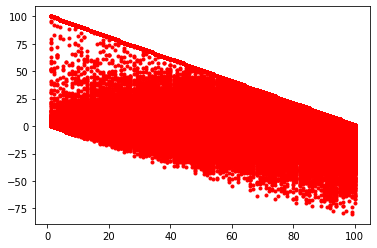

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df_2.rank,df_2.change,'r.')

Here we see as songs fall down the charts their change goes more negative. The higher a song is up the charts the higher it's change. This makes intuitive sense as the songs highest up the charts should be the ones who increased the most from the previous week. 

In [14]:
r = np.corrcoef(df_2.rank, df_2.change)
r

array([[ 1.        , -0.04822847],
       [-0.04822847,  1.        ]])

Here we see a coorerelation of minus 0.048 which indicates a weak negative relationship between rank and change. This agrees with our scatterplot. 

6. Songs will typically appear in the charts for a number of weeks, as such, there are a number of duplicate entries. Delete all duplicate entries, keeping only the most recent entries of a particular song by a particular artist in the charts. How many unique songs (with unique artists) have appeared in the charts since its inception in 1958? Repeat Q2C for the new DataFrame, with unique entries only. Are the top 10 entries the same? If not, discuss why they may have changed.

    You may find the pandas method `drop_duplicates` useful. See the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) for details on how to apply this method to a DataFrame.

In [18]:
df_3 = df_2

In [19]:
df_3 = df_3.drop_duplicates(subset=['song', 'artist'],keep='first', inplace= False)
print(df_3)

        rank                                 song                     artist  \
0          1                               Butter                        BTS   
1          2                             Good 4 U             Olivia Rodrigo   
2          3                           Levitating  Dua Lipa Featuring DaBaby   
3          4                         Kiss Me More     Doja Cat Featuring SZA   
4          5       Montero (Call Me By Your Name)                  Lil Nas X   
...      ...                                  ...                        ...   
328476    90                                 Stay          The Ames Brothers   
328482    96                        Over And Over            Thurston Harris   
328484    98                      Little Serenade          The Ames Brothers   
328485    99  I'll Get By (As Long As I Have You)             Billy Williams   
328486   100                                 Judy            Frankie Vaughan   

        lastweek  peakrank  weeksonboar

In [20]:
Artists_unique = df_3['artist'].value_counts()
Artists_unique[:10]

Glee Cast             183
Taylor Swift          119
Drake                  99
The Beatles            65
Aretha Franklin        64
Elton John             58
The Rolling Stones     57
Stevie Wonder          54
The Beach Boys         54
Madonna                53
Name: artist, dtype: int64

Here we see our unique entry dataset, we have dropped almost 300,000 rows. Here we have seen a profound change in our list with Glee taking the top spot. The trend seems to be more groups joining the list with Glee, The Beatles, The Beach Boys and The Rolling Stones. This may be due to groups creating more songs but overall less popular songs than individual artists. Glee famously covered numerous hit songs every episode. With around 22 episodes a year and so many performers under one group name, it is easy to see why they had so many songs on the charts. It would be hard for an individual performer to create so many hits so quickly(not for lack of trying from Taylor Swift). Doing some research, it appears Taylor Swift has only released original 196 songs as of this year, while Glee released 700 cover songs of songs that were already hits. 

7. Recompute the summary statistics for the change in ranking from the previous week and recreate the scatter plot of the current rank versus the change in ranking for the new DataFrame. Discuss and interpret any changes in these statistics and the plot.


In [21]:
df_3[['change']].describe()

,change
count,29467.000000
mean,-7.586894
std,15.880717
min,-80.000000
25%,-15.000000
50%,-7.000000
75%,0.000000
max,92.000000


Here we see a substantial change in the mean change. This makes clear intuitive sense. The final week a song appears on the charts, it will be falling. Here an average of minus 7.59 ranks. Here we maintain our minimum which again is intuitive as the largest drop of a song in a week ever likely signals it's final week on the charts. Our standard deviation has increased indicating a greater average distance from the mean for the average value in our dataset. This may be due to our sample size dropping considerably, with most positve values being removed due to the latest values being kept. 

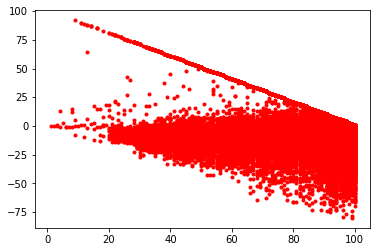

In [22]:
df_3.rank = df_3['rank']
plt.figure()
plt.plot(df_3.rank,df_3.change,'r.')

Here we can see a considerable amount of our positive change entries have been removed. This supports our view that dropping songs are largely latest entries.

8. Using the new DataFrame, with unique entries only, create a histogram for the length of time each entry spent in the charts. Describe and interpret your plot. Compute the summary statistics for the length of time a song spends in the charts. Discuss these statistics in relation to your histogram.

Text(0, 0.5, 'Frequency')

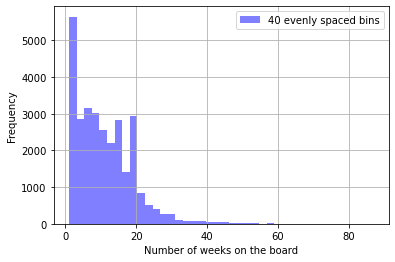

In [23]:
df_3.weeksonboard.hist(bins=40,color='b',alpha=0.5,label='40 evenly spaced bins')
plt.legend()
plt.xlabel('Number of weeks on the board')
plt.ylabel('Frequency')

Here we see our histagram is Right Skewed. This means most of our songs only last 1 week on the charts. Notably few make it over 20 weeks. However it appears more make it to 20 than they do 19 which seems counter intuitive. 

In [24]:
df_3[['weeksonboard']].describe()

,weeksonboard
count,29467.000000
mean,11.149082
std,8.287711
min,1.000000
25%,5.000000
50%,10.000000
75%,16.000000
max,87.000000


Here we see our summary stats for weeks on the board. With an average of 11.15, this seems intuitive to our graph, however standard deviation of 8.29 cannot be seen from our histogram. Lastly on min can be seen here at 1, but our max can not be seen on our graph as it's frequency is too small relative to the graph. 

9. Using the new DataFrame, with unique entries only, create a histogram for the peak rank. Describe and interpret your plot. Compute the summary statistics for peak rank. Discuss these statistics in relation to your histogram.

Text(0, 0.5, 'Frequency')

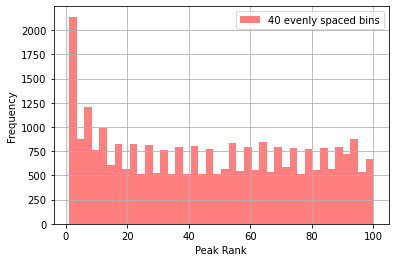

In [25]:
df_3.peakrank.hist(bins=40,color='r',alpha=0.5,label='40 evenly spaced bins')
plt.legend()
plt.xlabel('Peak Rank')
plt.ylabel('Frequency')

Here we see right skewed data, however our data levels out as rank decreases. It makes sense that there would be a disproportionate amount of number 1s. This is due to their being no higher position for it to take. What is interesting is there appears more entries over 80 then between 20 and 40. This may be because those middle spots tend to be taken up more by previous higher placed entries as they leave the charts completely the week after falling to the middle positions. 

In [26]:
df_3[['peakrank']].describe()

,peakrank
count,29467.000000
mean,46.679302
std,30.541818
min,1.000000
25%,18.000000
50%,46.000000
75%,73.000000
max,100.000000


Peak rank is notable for having by far the highest standard deviation we've seen so far. This means the peak rank of a song is particularly difficult to predict. There isn't much more to learn from these statistics. Predictably the min and max are 1 and 100 and as seen from our histogram, our average is slightly above 50. This of course skewed by higher peaked songs moving down the charts. 

10. Write a short summary on what you have learnt about the Billboard Hot 100 Chart from this analysis. (5-10 sentences)

I have learned a considerable amount about the Billboard Hot 100 charts from my research. 

1. Given Taylor Swift's young age of 31, she will likely be extending all of her current records considerably and likely remain on these charts for years to come. She is far ahead of her peers in terms of weeks on the charts. 

2. I found that groups tend to create more songs on the charts but seem to spend less weeks overall on the charts. 

3. I found that in charts where there is a limit to one's table position, the histogram for peakrank will be inherently Right-Skewed data. This will be useful for future research. 

4. I learned that there really isn't too strong a relationship between present rank and change. 

5. Probably most importantly, I found that alot of songs can get on the charts for 1 week, but very few can be on it over 40 weeks. This may be a useful leason for artists to know, that just because your song was a massive hit, it does not mean this would be a common occurence. 